   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Number of records (rows) in the 

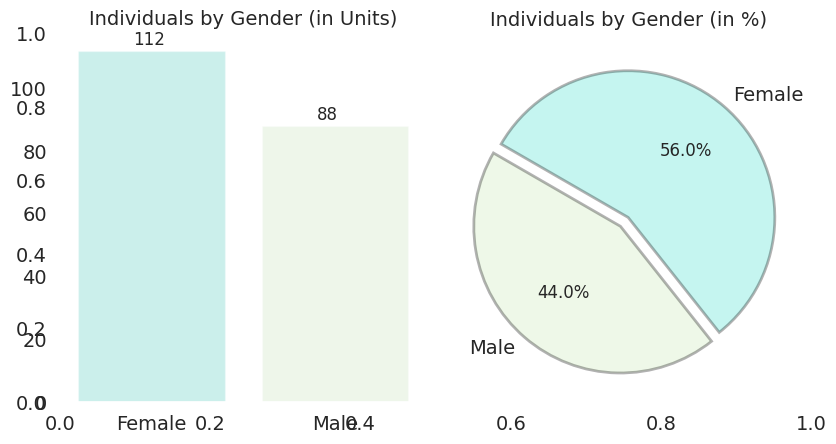

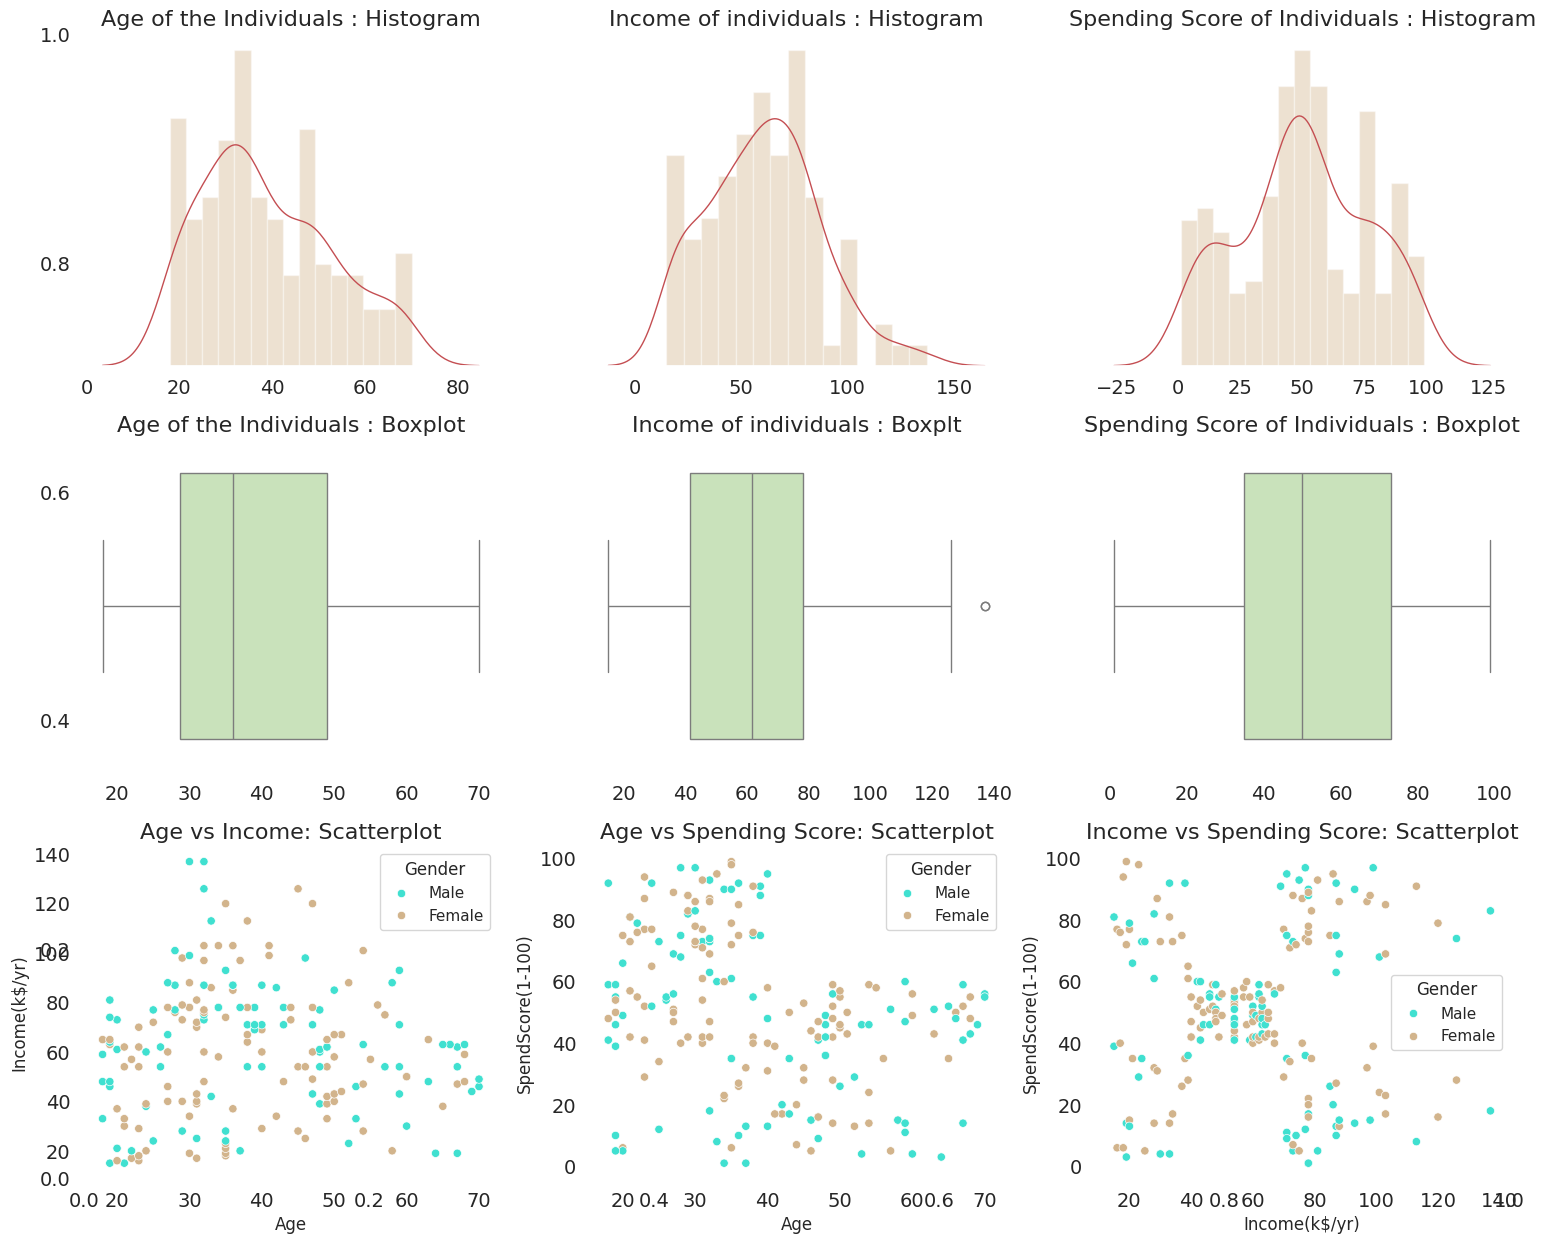

   Income(k$/yr)  SpendScore(1-100)
0             15                 39
1             15                 81
2             16                  6
3             16                 77
4             17                 40
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 

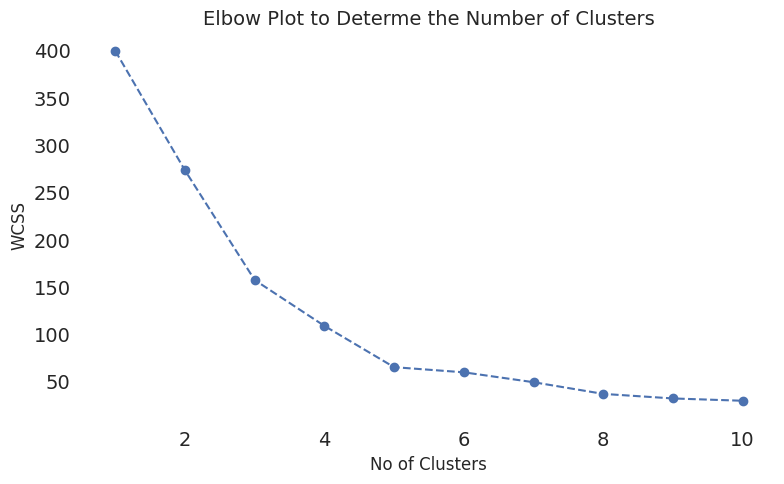

The Knee located at figure: 5


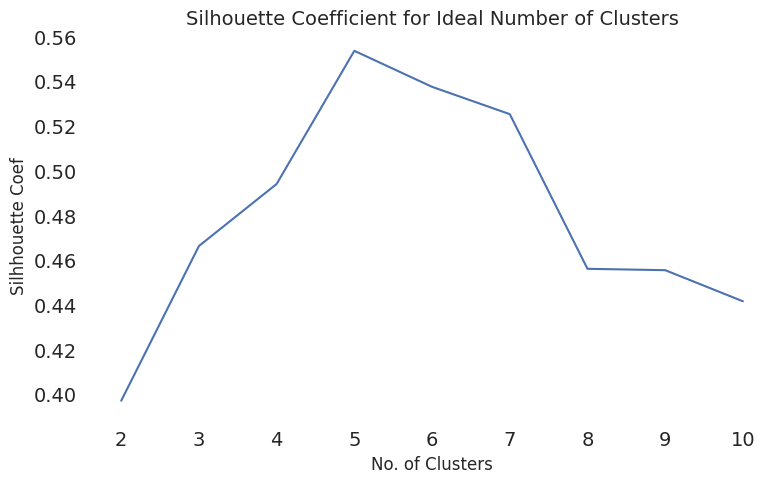

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        4
1    Male   21             15                 81        2
2  Female   20             16                  6        4
3  Female   23             16                 77        2
4  Female   31             17                 40        4


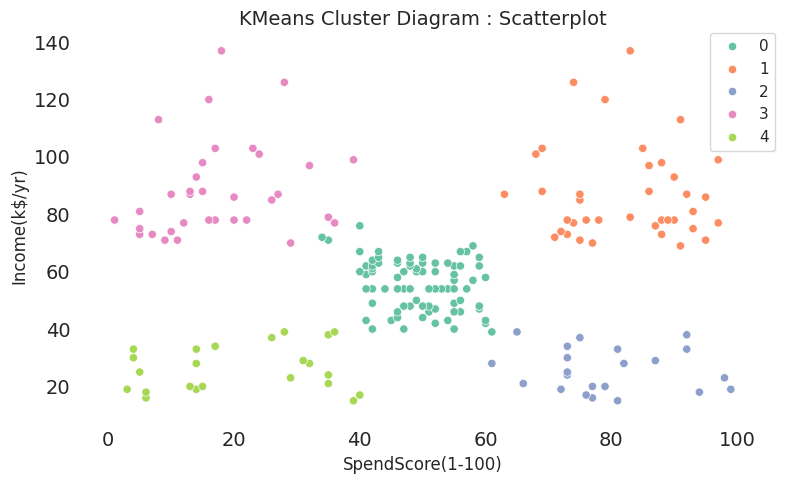

   Income(k$/yr)  SpendScore(1-100)
0       0.000000           0.387755
1       0.000000           0.816327
2       0.008197           0.051020
3       0.008197           0.775510
4       0.016393           0.397959


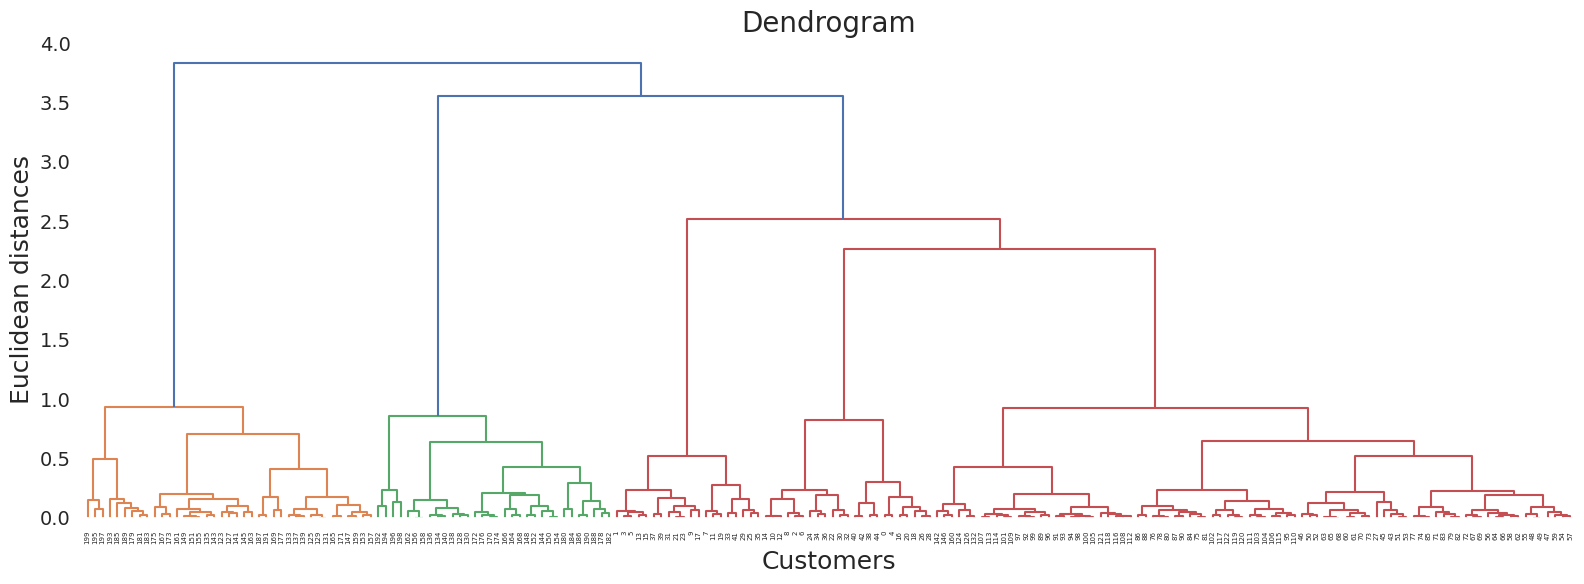

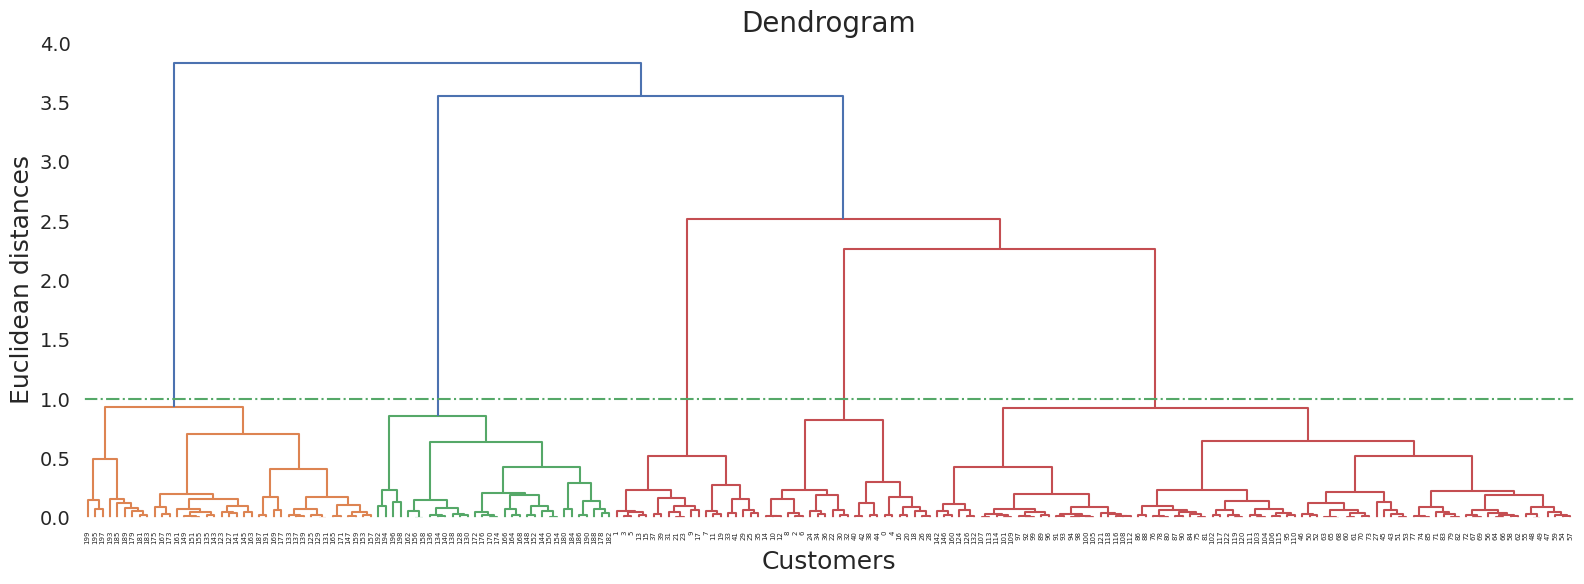

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        1
1    Male   21             15                 81        3
2  Female   20             16                  6        1
3  Female   23             16                 77        3
4  Female   31             17                 40        1


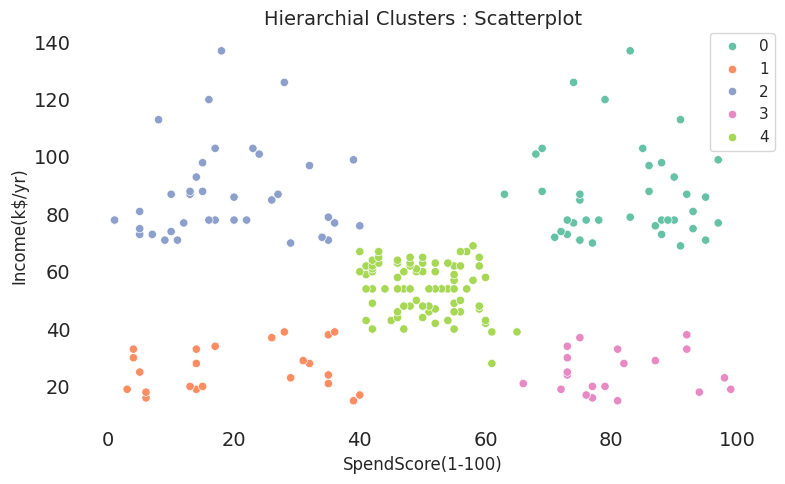

ZeroDivisionError: float division by zero

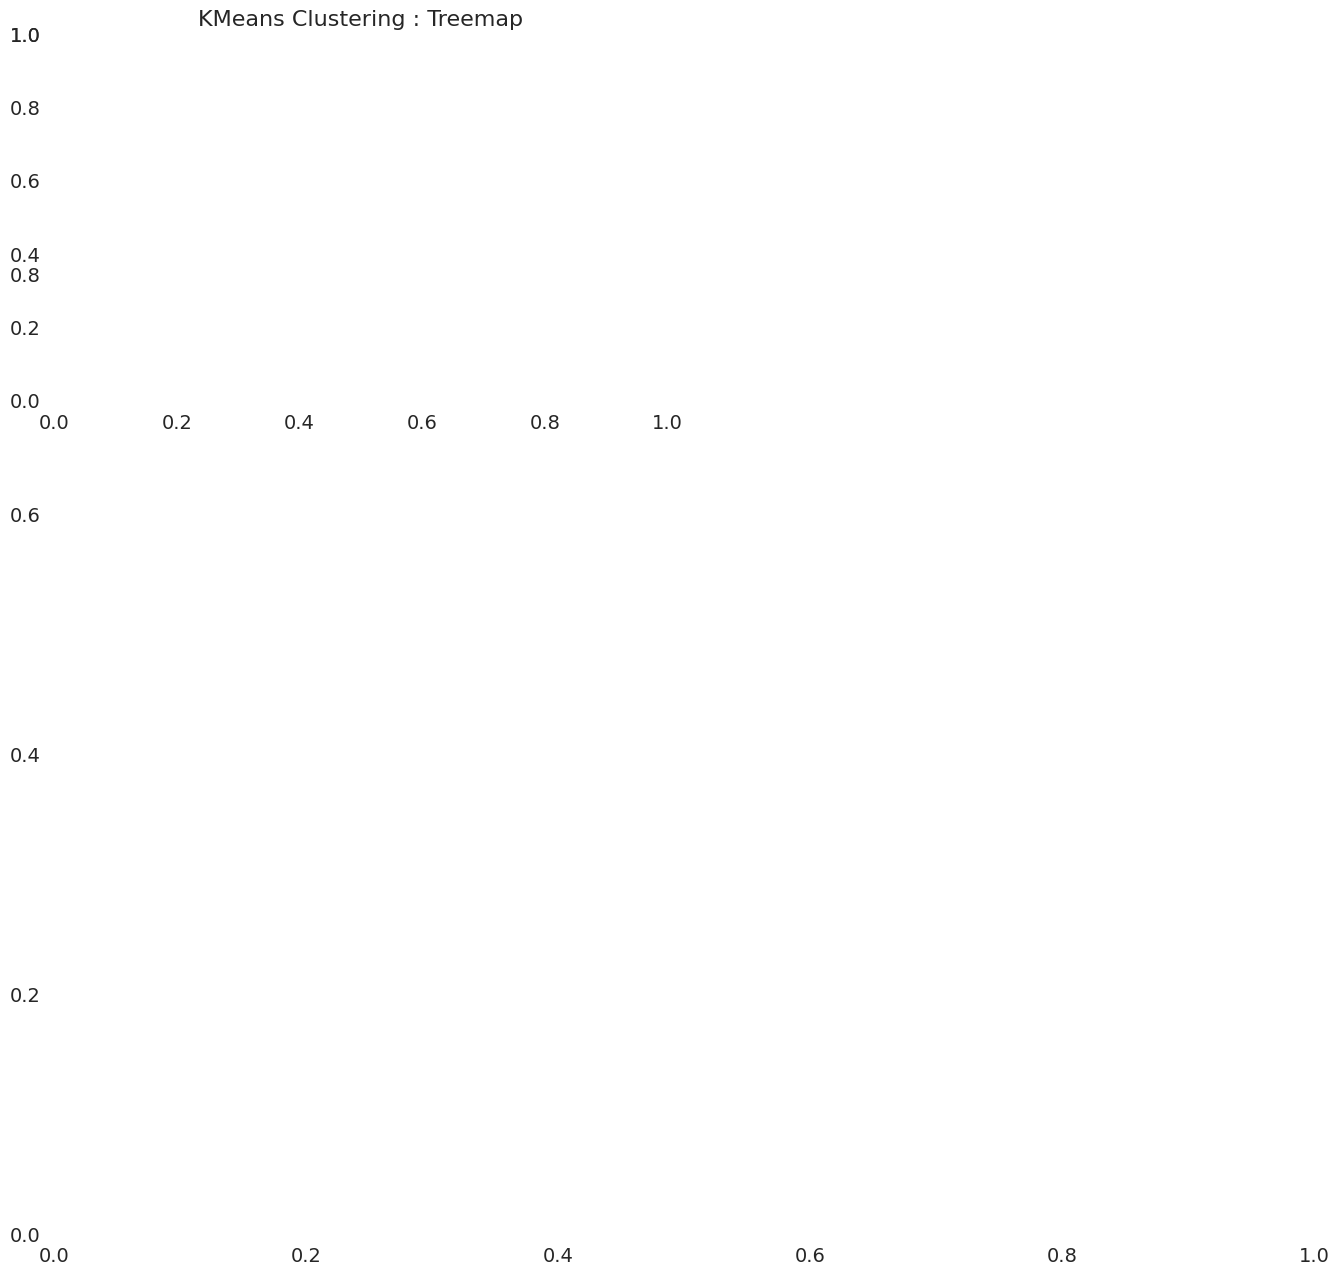

In [17]:
## Load the relevant libraries

import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
%matplotlib inline
!pip install --user squarify
import squarify

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

## Load the dataset into the environment


df = pd.read_csv('Mall_Customers .csv')  # dengan spasi
print(df.head())
print(df.columns)

## Check a few records in the dataset that we just loaded

print(df.head(5))

## Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

## Take a look into feature characteristics (datatypes, and descriptive statistics)

print('\n')
print(df.info())
print('---'*25, '\n', df.describe(include='all').T, '---'*25, '\n')

## Rename a few variables

df.rename(columns = {'Annual Income (k$)' : 'Income(k$/yr)', 'Spending Score (1-100)' : 'SpendScore(1-100)'}, inplace=True)

## Drop CustomerID variable, as it is redundant in our analysis

df = df.drop(columns=['CustomerID'])

print(df.columns)  ## Check the column names

## Gender feature analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

## Total Individuals by Gender (in Units)
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

## Total Individuals by Gender (in %)
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

## Let's understand the patterns and trends in the numerical variables
## Age, Income(k$/yr), and SpendScore(1-100) are the 3 numerical variables we have here

plt.subplots(figsize=(16,13))

plt.subplot(3,3,1)
plt.title('Age of the Individuals : Histogram', fontsize=16)
sns.distplot(df['Age'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,2)
plt.title('Income of individuals : Histogram', fontsize=16)
sns.distplot(df['Income(k$/yr)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.distplot(df['SpendScore(1-100)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income(k$/yr)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['SpendScore(1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income(k$/yr)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income(k$/yr)', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

## Let's start analysis by creating a subset dataframe

X = df[['Income(k$/yr)', 'SpendScore(1-100)']].copy()
print(X.head(5))

## Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)

## Applying the elbow method to determine the number of clusters

wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

wcss

## Plotting the Elbow Plot to determine the ideal number of clusters

plt.figure(figsize=(8,5))

plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Plot to Determe the Number of Clusters', fontsize=14)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

## Identifying the Knee in the Elbow Plot with KneeLocator function
## First install the latest Kneed module
!pip install --upgrade kneed
from kneed import KneeLocator

## Knee
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

## Applying the Silhouette method to determine the number of clusters

silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

## Plot the Silhouette Coefficient data

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

## Model fitting with 5 clusters

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans

## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            ## making a copy of original dataframe
df_Kmeans['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Kmeans.head(5))

## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

## Let's start the Hierarchial analysis by normalizing the data and
## building a dataframe for analysis

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## Draw the threshold level to identify the ideal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## Model fitting with 5 clusters

clusters = AgglomerativeClustering(n_clusters=5, linkage='average', metric='manhattan')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

## Creating a New Dataframe with an appended cluster column

df_Hierar = df.copy()   ## making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar.head(5))

## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

# Visualising the count of records by each cluster through Treemap, pie & bar charts

plt.subplots(figsize=(14,13))
my_pal = ('#00FFFF','#40E0D0', '#c7e9b4', '#D8BFD8', '#EEE8AA')
my_col = ('#00C78C', '#D2B48C', '#FF6347', '#4682B4','#FAFAD2')

plt.subplot(3,2,1)
plt.title('KMeans Clustering : Treemap', fontsize=16)
labels = df_Kmeans['Cluster'].value_counts().index.get_level_values(0).tolist()
sizes = df_Kmeans['Cluster'].value_counts().reset_index().Cluster.values.tolist()
squarify.plot(sizes=sizes, label=labels, color=my_pal, alpha=.3)
plt.axis('off')

plt.subplot(3,2,2)
plt.title('Hierarchical Clustering : Treemap', fontsize=16)
labels = df_Hierar['Cluster'].value_counts().index.get_level_values(0).tolist()
sizes = df_Hierar['Cluster'].value_counts().reset_index().Cluster.values.tolist()
squarify.plot(sizes=sizes, label=labels, color=my_pal, alpha=.3)
plt.axis('off')

plt.subplot(3,2,3)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1]
plt.title('KMeans Clustering : Records by Cluster (in %)', fontsize=16)
sizes = df_Kmeans['Cluster'].value_counts().sort_index() / df_Kmeans['Cluster'].value_counts().sum()*100
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_pal, explode=my_xpl, counterclock=False, startangle=120, wedgeprops={'alpha':0.1, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.subplot(3,2,4)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1]
plt.title('Hierarchial Clustering : Records by Cluster (in %)', fontsize=16)
sizes = df_Hierar['Cluster'].value_counts().sort_index() / df_Hierar['Cluster'].value_counts().sum()*100
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_col, explode=my_xpl, counterclock=False, startangle=150, wedgeprops={'alpha':0.1, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.subplot(3,2,5)
plt.title('KMeans Clustering : Records by Cluster (in Units)', fontsize=16)
my_ord = [0,1,2,3,4]
ax = sns.countplot(y="Cluster", data=df_Kmeans,  palette=my_pal, order=my_ord, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])

plt.subplot(3,2,6)
plt.title('Hierarchial Clustering : Records by Cluster (in Units)', fontsize=16)
my_ord = [0,1,2,3,4]
ax = sns.countplot(y="Cluster", data=df_Hierar, palette=my_col, order=my_ord, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])

plt.show()

